<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus:** Do insightful data exploration in addition to the crosstab.

In [2]:
# Getting a quick look at df with a random sample
df.sample(10)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
1379,2007,former american senator,4/9/07,Politician,Bill Bradley,Government and Politics
2468,2014,actress,11/19/14,Acting,Jessica Chastain,"Acting, Comedy & Music"
302,2000,actress,7/18/00,Acting,Halle Berry,"Acting, Comedy & Music"
1830,2010,Comedian,2/22/10,Comedy,Ricky Gervais,"Acting, Comedy & Music"
449,2001,Singer,6/21/01,Musician,Mí_a,"Acting, Comedy & Music"
1963,2011,journalist,10/3/11,Media,Thomas Friedman,Media
2671,2015,television Series Creator,6/23/15,Media,Seth MacFarlane,Media
1885,2010,film director,6/21/10,Media,Josh Fox,Media
589,2002,actor,5/15/02,Acting,Rupert Everett,"Acting, Comedy & Music"
235,2000,actor,3/1/00,Acting,Tobey Maguire,"Acting, Comedy & Music"


In [0]:
# Defining variables for the series needed in crosstab function
year = df['Year']
occupation = df['Occupation']

In [4]:
# Making crosstab dataframe with year and occupation, and also a normalized index
ct = pd.crosstab(year, occupation, normalize='index')

# Seeing if percentages are correct -- they are
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

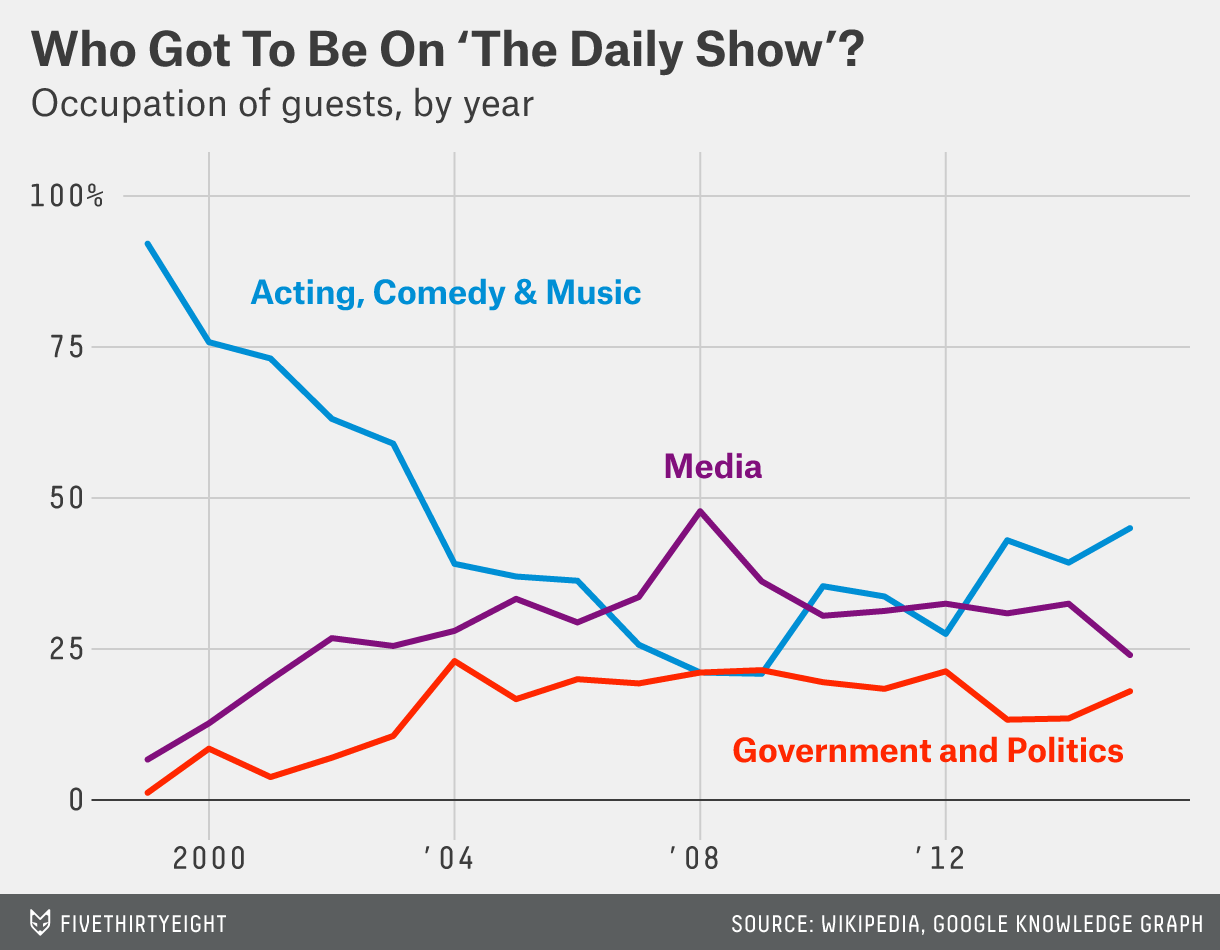

In [5]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hints:**
- You may want to use the crosstab you calculated in part 1!
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume altair would work too.
- Different visualization libraries have different expectations about how data is formatted, so you probably need to do some wrangling.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0 (` !pip install --upgrade seaborn`) and restart your runtime.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [0]:
#ax = ct.plot.line(); # Making plot object and looking at the most basic version of the plot

In [7]:
# Dropping 'Other' column because it's not needed for the plot
ct = ct.drop(columns='Other')

# Seeing that the column is dropped
ct.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.903614,0.012048,0.066265
2000,0.739645,0.082840,0.124260
2001,0.726115,0.038217,0.197452
2002,0.622642,0.069182,0.264151
2003,0.560241,0.102410,0.246988


In [8]:
# Multiplying each column by 100 to get % format to match example plot
# There's probably a better way to do this
ct['Acting, Comedy & Music'] = ct['Acting, Comedy & Music'] * 100
ct['Government and Politics'] = ct['Government and Politics'] * 100
ct['Media'] = ct['Media'] * 100

# Seeing the percent format
ct.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506
2000,73.964497,8.284024,12.426036
2001,72.611465,3.821656,19.745223
2002,62.264151,6.918239,26.415094
2003,56.024096,10.240964,24.698795


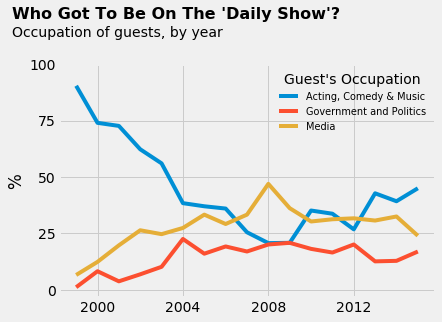

In [9]:
# Setting plot style
plt.style.use('fivethirtyeight')

# To plot
ax = ct.plot.line()

# Creating, positioning and setting font of title
ax.text(x=1996, y=120, s="Who Got To Be On The 'Daily Show'?",
       fontsize=16, fontweight='bold')

# Creating, positioning subtitle
ax.text(x=1996, y=112, s="Occupation of guests, by year")

# Removing xlabel, adding percent sign to ylabel and setting tick mark ranges
# to match the example
ax.set(xlabel=None, ylabel='%', xticks=range(2000, 2016, 4), yticks=range(0, 110, 25))

# Making the legend look a little better
ax.legend(title="Guest's Occupation", fontsize='x-small', frameon=False);

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

**Optional Bonus:** You can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [10]:
# Taking another quick look at the dataframe
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [11]:
# Looking at Guest value counts
df['Guest'].value_counts().head()

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Ricky Gervais     13
Paul Rudd         13
Name: Guest, dtype: int64

In [0]:
# Creating dataframe of top ten guests
top_ten = pd.DataFrame(df['Guest'].value_counts().nlargest(10))

In [13]:
# Looking at new dataframe
top_ten

,Guest
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Ricky Gervais,13
Paul Rudd,13
Tom Brokaw,12
Richard Lewis,10
Bill O'Reilly,10
Reza Aslan,10
Will Ferrell,10


In [14]:
# Making guest names a column instead of the index
top_ten = top_ten.reset_index()

# Looking at new column
top_ten

,index,Guest
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Ricky Gervais,13
4,Paul Rudd,13
5,Tom Brokaw,12
6,Richard Lewis,10
7,Bill O'Reilly,10
8,Reza Aslan,10
9,Will Ferrell,10


In [15]:
# Renaming the columns of top_ten dataframe
top_ten = top_ten.rename(columns={'Guest': 'Number of Appearances', 'index': 'Guest'})

# Looking at new column names
top_ten.head()

,Guest,Number of Appearances
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Ricky Gervais,13
4,Paul Rudd,13


In [16]:
# Installing latest version of seaborn for the top ten guests plot
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [17]:
# Checking to see that I have the correct version of seaborn
import seaborn as sns
sns.__version__

'0.9.0'

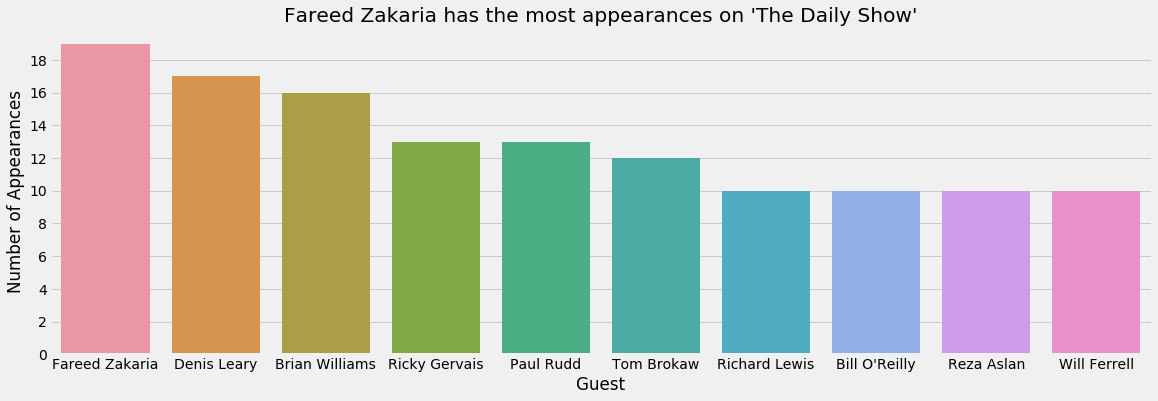

In [18]:
# Making a category bar plot with guests and their number of appearances
ax1 = sns.catplot('Guest','Number of Appearances', data=top_ten, kind='bar',
                  height=5.5, aspect=3);

# Adding an explanatory title
plt.title("Fareed Zakaria has the most appearances on 'The Daily Show'");

# Making plot easier to read by adding more tick marks
plt.yticks(range(0, 20, 2));